### Setup

In [136]:
# imports

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr

### Exploratory Data Analysis
*Dataset overall structure*

In [2]:
# load data
diabetes_data = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

print(f"DATA HEAD:\n{diabetes_data.head()}\n")
print(f"DATA COLUMNS:\n{list(diabetes_data.columns)}\n")
print(f"DATA MISSING VALUES:\n{diabetes_data.isna().any()}")

DATA HEAD:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0

*Dataset shape*

In [3]:
print(f"ROWS: {diabetes_data.shape[0]}")
print(f"COLUMNS: {diabetes_data.shape[1]}")

ROWS: 253680
COLUMNS: 22


*Columns and datatypes*

In [4]:
for i, col in enumerate(diabetes_data.columns):
    print(f"COLUMN NAME: {col} | COLUMN DTYPE: {diabetes_data.dtypes.iloc[i]}")

COLUMN NAME: Diabetes_binary | COLUMN DTYPE: float64
COLUMN NAME: HighBP | COLUMN DTYPE: float64
COLUMN NAME: HighChol | COLUMN DTYPE: float64
COLUMN NAME: CholCheck | COLUMN DTYPE: float64
COLUMN NAME: BMI | COLUMN DTYPE: float64
COLUMN NAME: Smoker | COLUMN DTYPE: float64
COLUMN NAME: Stroke | COLUMN DTYPE: float64
COLUMN NAME: HeartDiseaseorAttack | COLUMN DTYPE: float64
COLUMN NAME: PhysActivity | COLUMN DTYPE: float64
COLUMN NAME: Fruits | COLUMN DTYPE: float64
COLUMN NAME: Veggies | COLUMN DTYPE: float64
COLUMN NAME: HvyAlcoholConsump | COLUMN DTYPE: float64
COLUMN NAME: AnyHealthcare | COLUMN DTYPE: float64
COLUMN NAME: NoDocbcCost | COLUMN DTYPE: float64
COLUMN NAME: GenHlth | COLUMN DTYPE: float64
COLUMN NAME: MentHlth | COLUMN DTYPE: float64
COLUMN NAME: PhysHlth | COLUMN DTYPE: float64
COLUMN NAME: DiffWalk | COLUMN DTYPE: float64
COLUMN NAME: Sex | COLUMN DTYPE: float64
COLUMN NAME: Age | COLUMN DTYPE: float64
COLUMN NAME: Education | COLUMN DTYPE: float64
COLUMN NAME: Inco

*Target Variable: Diabetes_binary*

Diabetes_binary is a categorical binary indicator of whether or not an individual in the dataset is (pre)diabetic (1) or not (0). The value counts reveal the heavy imbalance of this dataset.

Value counts:
Diabetes_binary
Non-Diabetic      218334
(Pre-)Diabetic     35346
Name: count, dtype: int64

Class proportions:
Diabetes_binary
Non-Diabetic      0.860667
(Pre-)Diabetic    0.139333
Name: count, dtype: float64



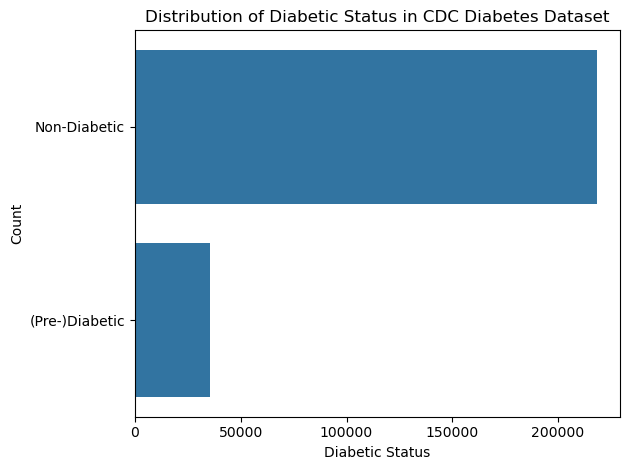

In [130]:
X = diabetes_data.drop(columns=["Diabetes_binary"])
y = diabetes_data["Diabetes_binary"]
    
y_vis = y.replace({0 : "Non-Diabetic", 1 : "(Pre-)Diabetic"})
counts = y_vis.value_counts()
print(f"Value counts:\n{counts}\n")
print(f"Class proportions:\n{counts / len(y_vis)}\n")

sns.countplot(data=y_vis)
plt.title("Distribution of Diabetic Status in CDC Diabetes Dataset")
plt.xlabel("Diabetic Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/target.png")
plt.show()
plt.close()

*Features*

Our feature matrix consists of 21 unique features.
* HighBP: a binary indicator of whether an individual has high blood pressure (1) or not (0)
* HighChol: a binary indicator of whether an individual has high cholesterol (1) or not (0)
* CholCheck: a binary indicator of whether an individual has had a cholesterol levels check in the past five years (1) or not (0)
* BMI: an integer representing an individual's BMI
* Smoker: a binary indicator of whether an individual has smoked over 100 cigarettes in their lifetime (1) or not (0)
* Stroke: a binary indicator of whether an individual has had a stroke in their lifetime (1) or not (0)
* HeartDiseaseorAttack: a binary indicator of whether an individual has had coronary heart disease or myocardial infarction (1) or not (0)
* PhysActivity: a binary indicator of whether an individual has participated in physical activity (excluding work) in the past 30 days (1) or not (0)
* Fruits: a binary indicator of whether an individual eats fruits daily (1) or not (0)
* Veggies: a binary indicator of whether an individual eats vegetables daily (1) or not (0)
* HvyAlcoholConsump: a binary indicator of whether an individual is a heavy drinker (14 drinks/week for men, 7 drinks/week for women, 1) or not (0)
* AnyHealthcare: a binary indicator of whether an individual has any healthcare coverage (1) or not (0)
* NoDocbcCost: a binary indicator of whether an individual was unable to visit a doctor when needed in the past year due to cost (1) or not (0)
* GenHlth: an ordinal representation of an individual's self-assessed general health on a scale from 1-5
* MentHlth: the number of days an individual had poor mental health in the past 30 days
* PhysHlth: the number of days an individual had an illness or injury in the past 30 days
* DiffWalk: a binary indicator of whether an individual has difficulty walking or climbing stairs (1) or not (0)
* Sex: a binary indicator of an individual's sex (male = 1, female = 0)
* Age: an ordinal representation of an individual's age category

| Feature | Age (years) |
----------|--------------
| 1 | 18-24 |
| 2 | 25-29 |
| 3 | 30-34 |
| 4 | 35-39 |
| 5 | 40-44 |
| 6 | 45-49 |
| 7 | 50-54 |
| 8 | 55-59 |
| 9 | 60-64 |
| 10 | 65-69 |
| 11 | 70-74 |
| 12 | 75-79 |
| 13 | >80 |

* Education: an ordinal representation of an individual's education level

| Feature | Education Level |
----------|---------
| 1 | Never attended/only kindergarten |
| 2 | Grades 1-8 |
| 3 | Grades 8-11 |
| 4 | Grade 12/GED |
| 5 | College (1-3 years) |
| 6 | College (4 years) |

* Income: an ordinal representation of an individual's income

| Feature | Income (USD) |
----------|---------
| 1 | <10k |
| 2 | 10k-<15k |
| 3 | 15k-<20k |
| 4 | 20k-<25k |
| 5 | 25k-<35k |
| 6 | 35k-<50k |
| 7 | 50k-<75k |
| 8 | >75k |

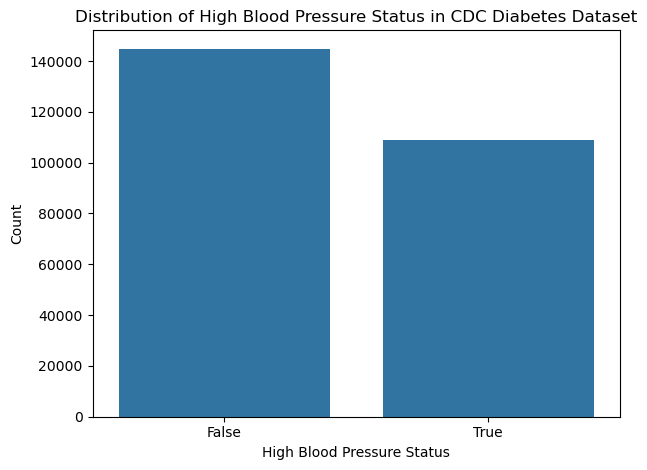

COUNTS:
HighBP
False    144851
True     108829
Name: count, dtype: int64
PROPORTIONS:
HighBP
False    0.570999
True     0.429001
Name: count, dtype: float64


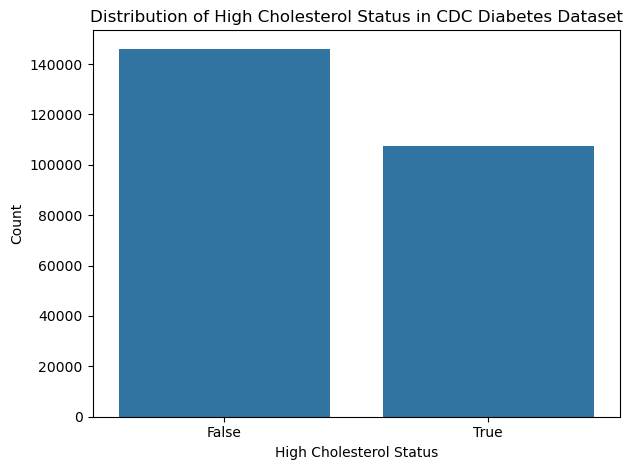

COUNTS:
HighChol
False    146089
True     107591
Name: count, dtype: int64
PROPORTIONS:
HighChol
False    0.575879
True     0.424121
Name: count, dtype: float64


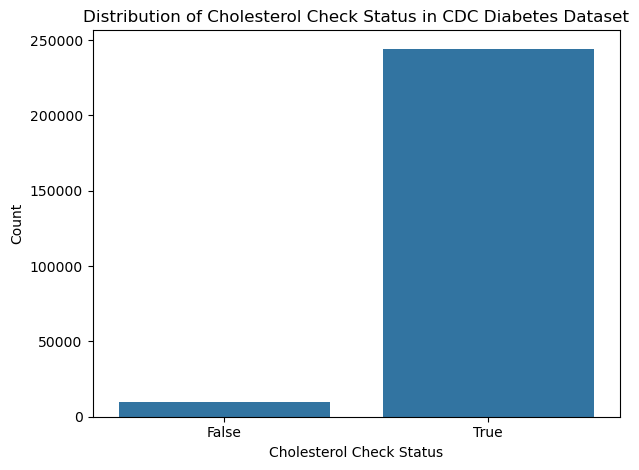

COUNTS:
CholCheck
True     244210
False      9470
Name: count, dtype: int64
PROPORTIONS:
CholCheck
True     0.96267
False    0.03733
Name: count, dtype: float64


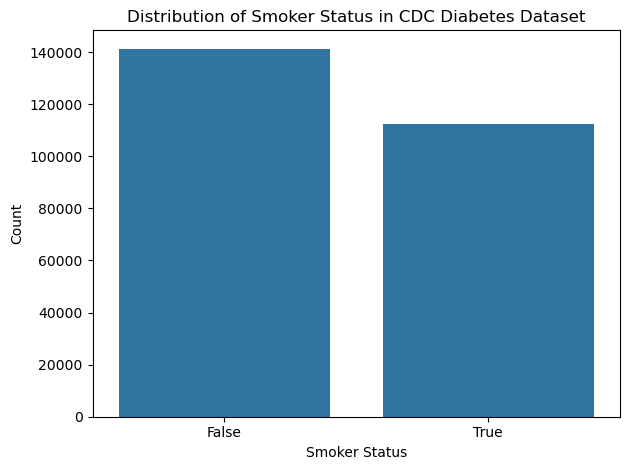

COUNTS:
Smoker
False    141257
True     112423
Name: count, dtype: int64
PROPORTIONS:
Smoker
False    0.556831
True     0.443169
Name: count, dtype: float64


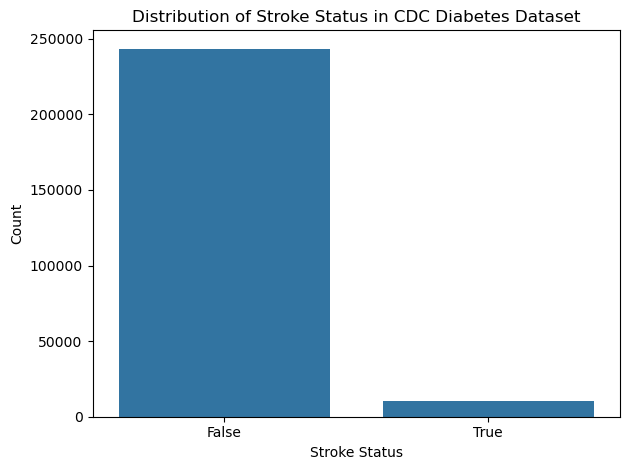

COUNTS:
Stroke
False    243388
True      10292
Name: count, dtype: int64
PROPORTIONS:
Stroke
False    0.959429
True     0.040571
Name: count, dtype: float64


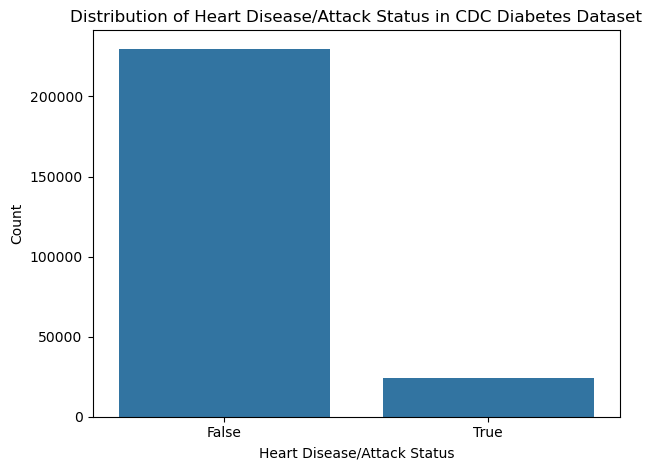

COUNTS:
HeartDiseaseorAttack
False    229787
True      23893
Name: count, dtype: int64
PROPORTIONS:
HeartDiseaseorAttack
False    0.905814
True     0.094186
Name: count, dtype: float64


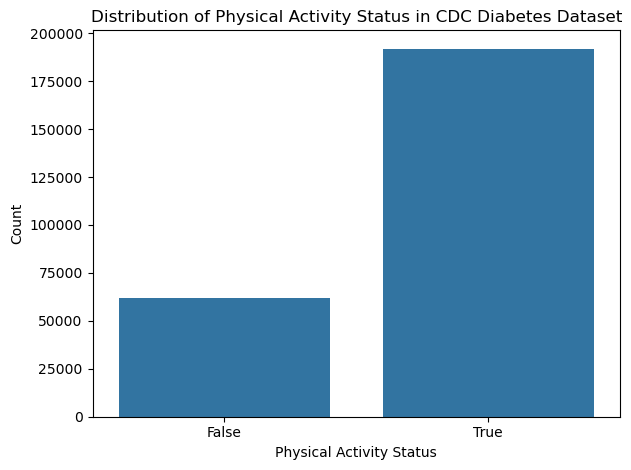

COUNTS:
PhysActivity
True     191920
False     61760
Name: count, dtype: int64
PROPORTIONS:
PhysActivity
True     0.756544
False    0.243456
Name: count, dtype: float64


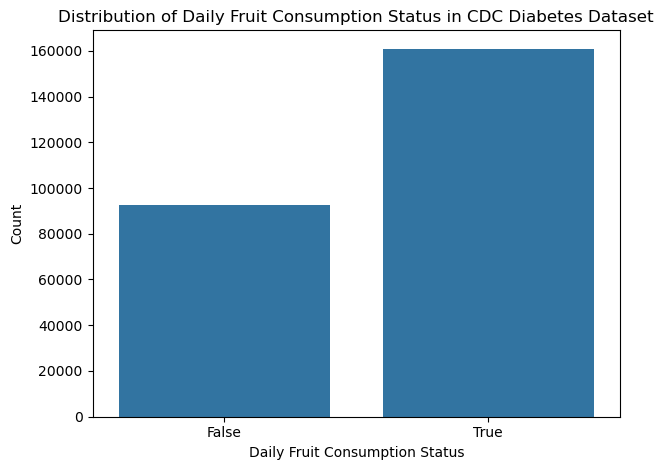

COUNTS:
Fruits
True     160898
False     92782
Name: count, dtype: int64
PROPORTIONS:
Fruits
True     0.634256
False    0.365744
Name: count, dtype: float64


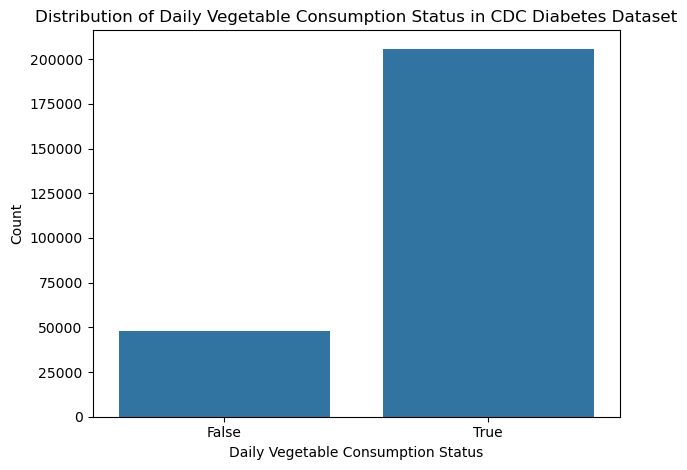

COUNTS:
Veggies
True     205841
False     47839
Name: count, dtype: int64
PROPORTIONS:
Veggies
True     0.81142
False    0.18858
Name: count, dtype: float64


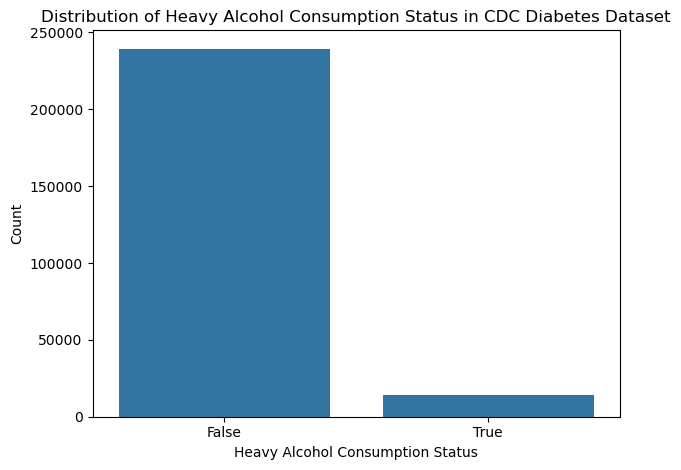

COUNTS:
HvyAlcoholConsump
False    239424
True      14256
Name: count, dtype: int64
PROPORTIONS:
HvyAlcoholConsump
False    0.943803
True     0.056197
Name: count, dtype: float64


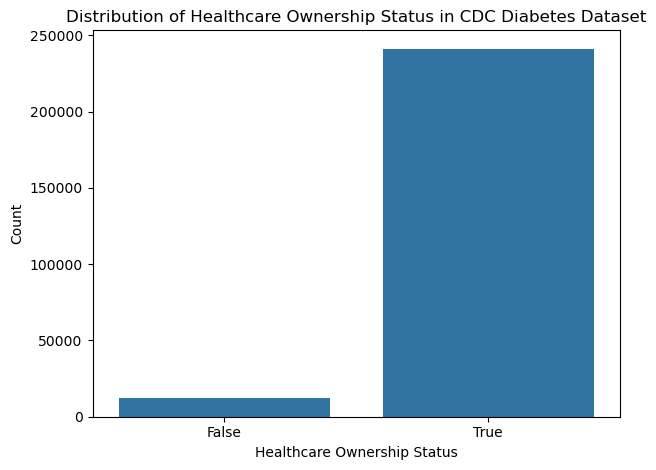

COUNTS:
AnyHealthcare
True     241263
False     12417
Name: count, dtype: int64
PROPORTIONS:
AnyHealthcare
True     0.951053
False    0.048947
Name: count, dtype: float64


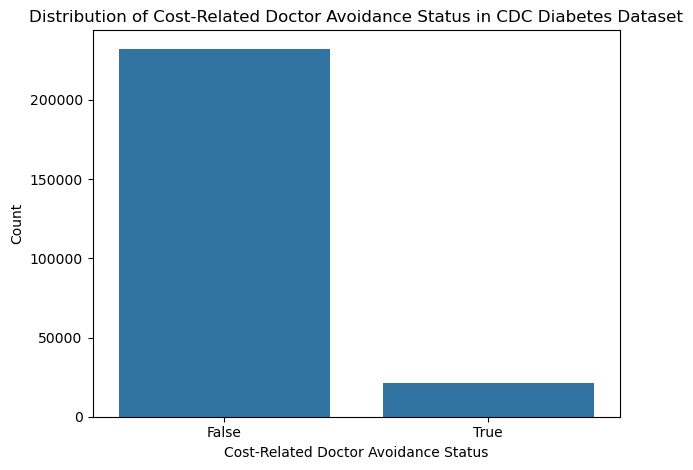

COUNTS:
NoDocbcCost
False    232326
True      21354
Name: count, dtype: int64
PROPORTIONS:
NoDocbcCost
False    0.915823
True     0.084177
Name: count, dtype: float64


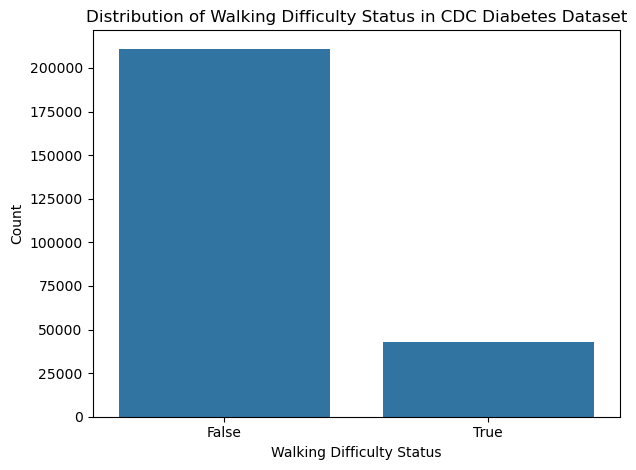

COUNTS:
DiffWalk
False    211005
True      42675
Name: count, dtype: int64
PROPORTIONS:
DiffWalk
False    0.831776
True     0.168224
Name: count, dtype: float64


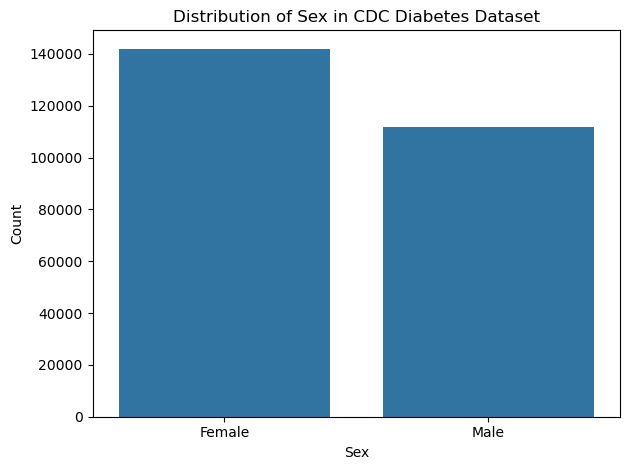

COUNTS:
Sex
Female    141974
Male      111706
Name: count, dtype: int64
PROPORTIONS:
Sex
Female    0.559658
Male      0.440342
Name: count, dtype: float64


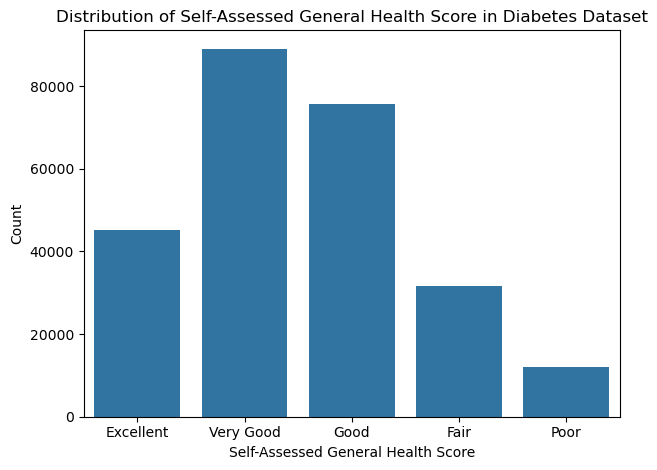

SUMMARY STATISTICS:
count    253680.000000
mean          2.511392
std           1.068477
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64


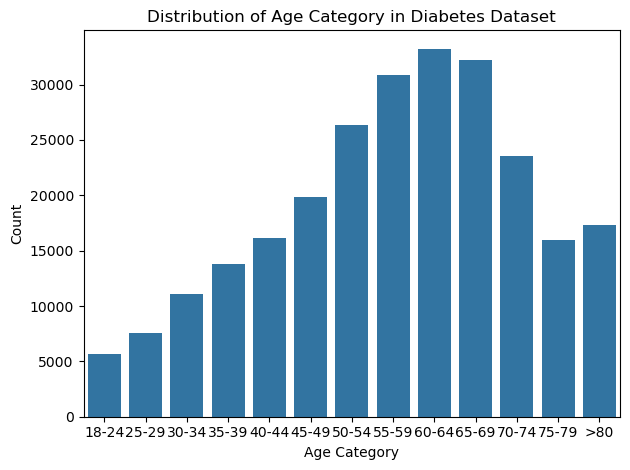

SUMMARY STATISTICS:
count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64


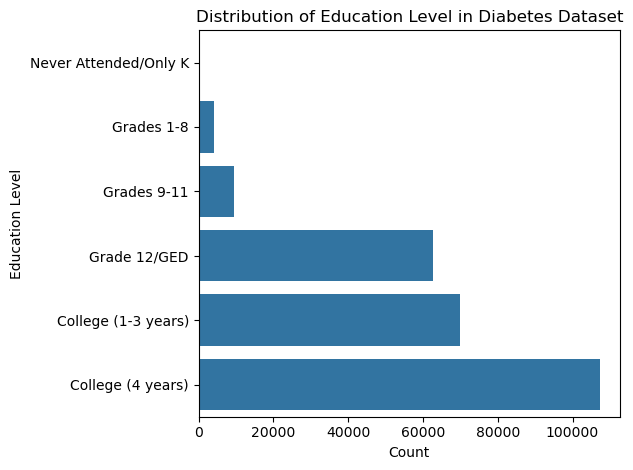

SUMMARY STATISTICS:
count    253680.000000
mean          5.050434
std           0.985774
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64


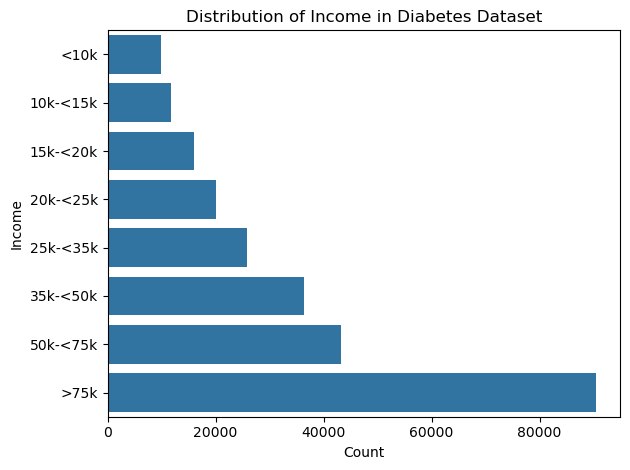

SUMMARY STATISTICS:
count    253680.000000
mean          6.053875
std           2.071148
min           1.000000
25%           5.000000
50%           7.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64


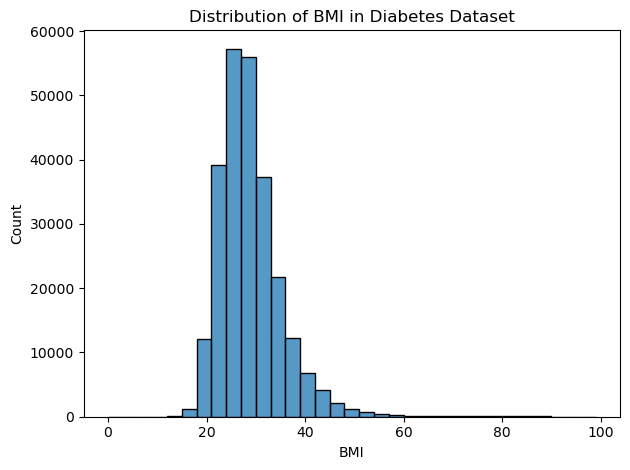

SUMMARY STATISTICS:
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64


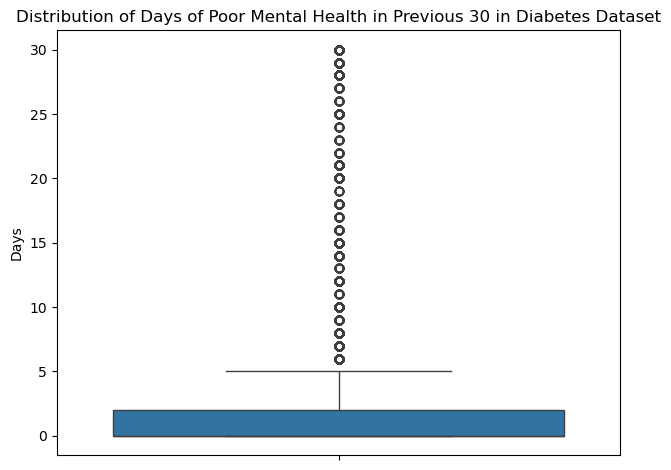

SUMMARY STATISTICS:
count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64


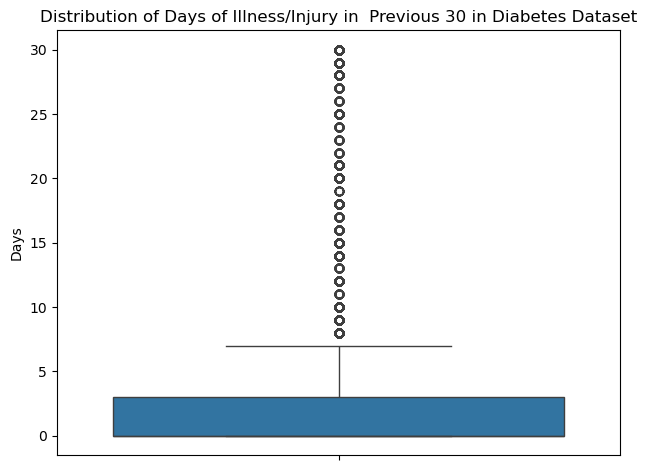

SUMMARY STATISTICS:
count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64


In [131]:
# individual features
# HighBP
high_bp_vis = diabetes_data["HighBP"].astype(bool)
sns.barplot(data=high_bp_vis.value_counts())
plt.title("Distribution of High Blood Pressure Status in CDC Diabetes Dataset")
plt.xlabel("High Blood Pressure Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{high_bp_vis.value_counts()}")
print(f"PROPORTIONS:\n{high_bp_vis.value_counts() / len(high_bp_vis)}")

# HighChol
high_chol_vis = diabetes_data["HighChol"].astype(bool)
sns.barplot(data=high_chol_vis.value_counts())
plt.title("Distribution of High Cholesterol Status in CDC Diabetes Dataset")
plt.xlabel("High Cholesterol Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{high_chol_vis.value_counts()}")
print(f"PROPORTIONS:\n{high_chol_vis.value_counts() / len(high_chol_vis)}")

# CholCheck
chol_check_vis = diabetes_data["CholCheck"].astype(bool)
sns.barplot(data=chol_check_vis.value_counts())
plt.title("Distribution of Cholesterol Check Status in CDC Diabetes Dataset")
plt.xlabel("Cholesterol Check Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{chol_check_vis.value_counts()}")
print(f"PROPORTIONS:\n{chol_check_vis.value_counts() / len(chol_check_vis)}")

# Smoker
smoker_vis = diabetes_data["Smoker"].astype(bool)
sns.barplot(data=smoker_vis.value_counts())
plt.title("Distribution of Smoker Status in CDC Diabetes Dataset")
plt.xlabel("Smoker Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{smoker_vis.value_counts()}")
print(f"PROPORTIONS:\n{smoker_vis.value_counts() / len(smoker_vis)}")

# Stroke
stroke_vis = diabetes_data["Stroke"].astype(bool)
sns.barplot(data=stroke_vis.value_counts())
plt.title("Distribution of Stroke Status in CDC Diabetes Dataset")
plt.xlabel("Stroke Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/stroke.png")
plt.show()
plt.close()
print(f"COUNTS:\n{stroke_vis.value_counts()}")
print(f"PROPORTIONS:\n{stroke_vis.value_counts() / len(stroke_vis)}")

# HeartDiseaseorAttack
hdoa_vis = diabetes_data["HeartDiseaseorAttack"].astype(bool)
sns.barplot(data=hdoa_vis.value_counts())
plt.title("Distribution of Heart Disease/Attack Status in CDC Diabetes Dataset")
plt.xlabel("Heart Disease/Attack Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{hdoa_vis.value_counts()}")
print(f"PROPORTIONS:\n{hdoa_vis.value_counts() / len(hdoa_vis)}")

# PhysActivity
phys_activity_vis = diabetes_data["PhysActivity"].astype(bool)
sns.barplot(data=phys_activity_vis.value_counts())
plt.title("Distribution of Physical Activity Status in CDC Diabetes Dataset")
plt.xlabel("Physical Activity Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{phys_activity_vis.value_counts()}")
print(f"PROPORTIONS:\n{phys_activity_vis.value_counts() / len(phys_activity_vis)}")

# Fruits
fruits_vis = diabetes_data["Fruits"].astype(bool)
sns.barplot(data=fruits_vis.value_counts())
plt.title("Distribution of Daily Fruit Consumption Status in CDC Diabetes Dataset")
plt.xlabel("Daily Fruit Consumption Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{fruits_vis.value_counts()}")
print(f"PROPORTIONS:\n{fruits_vis.value_counts() / len(fruits_vis)}")

# Veggies
veggies_vis = diabetes_data["Veggies"].astype(bool)
sns.barplot(data=veggies_vis.value_counts())
plt.title("Distribution of Daily Vegetable Consumption Status in CDC Diabetes Dataset")
plt.xlabel("Daily Vegetable Consumption Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{veggies_vis.value_counts()}")
print(f"PROPORTIONS:\n{veggies_vis.value_counts() / len(veggies_vis)}")

# HvyAlcoholConsump
alc_vis = diabetes_data["HvyAlcoholConsump"].astype(bool)
sns.barplot(data=alc_vis.value_counts())
plt.title("Distribution of Heavy Alcohol Consumption Status in CDC Diabetes Dataset")
plt.xlabel("Heavy Alcohol Consumption Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{alc_vis.value_counts()}")
print(f"PROPORTIONS:\n{alc_vis.value_counts() / len(alc_vis)}")

# AnyHealthcare
health_vis = diabetes_data["AnyHealthcare"].astype(bool)
sns.barplot(data=health_vis.value_counts())
plt.title("Distribution of Healthcare Ownership Status in CDC Diabetes Dataset")
plt.xlabel("Healthcare Ownership Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/health.png")
plt.show()
plt.close()
print(f"COUNTS:\n{health_vis.value_counts()}")
print(f"PROPORTIONS:\n{health_vis.value_counts() / len(health_vis)}")

# NoDocbcCost
no_doc_vis = diabetes_data["NoDocbcCost"].astype(bool)
sns.barplot(data=no_doc_vis.value_counts())
plt.title("Distribution of Cost-Related Doctor Avoidance Status in CDC Diabetes Dataset")
plt.xlabel("Cost-Related Doctor Avoidance Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{no_doc_vis.value_counts()}")
print(f"PROPORTIONS:\n{no_doc_vis.value_counts() / len(no_doc_vis)}")

# DiffWalk
diff_walks_vis = diabetes_data["DiffWalk"].astype(bool)
sns.barplot(data=diff_walks_vis.value_counts())
plt.title("Distribution of Walking Difficulty Status in CDC Diabetes Dataset")
plt.xlabel("Walking Difficulty Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{diff_walks_vis.value_counts()}")
print(f"PROPORTIONS:\n{diff_walks_vis.value_counts() / len(diff_walks_vis)}")

# Sex
sex_vis = diabetes_data["Sex"].replace({0 : "Female", 1 : "Male"})
sns.barplot(data=sex_vis.value_counts())
plt.title("Distribution of Sex in CDC Diabetes Dataset")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"COUNTS:\n{sex_vis.value_counts()}")
print(f"PROPORTIONS:\n{sex_vis.value_counts() / len(sex_vis)}")


# GenHlth
genhlth_vals = [
    "Excellent",
    "Very Good",
    "Good",
    "Fair",
    "Poor"
]

genhlth_vis = diabetes_data["GenHlth"].astype(int)
to_plot = genhlth_vis.value_counts().sort_index()
to_plot.index = genhlth_vals
sns.barplot(data=to_plot)
plt.title("Distribution of Self-Assessed General Health Score in Diabetes Dataset")
plt.xlabel("Self-Assessed General Health Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{genhlth_vis.describe()}")

# Age
age_vals = [
    "18-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
    "60-64",
    "65-69",
    "70-74",
    "75-79",
    ">80"
]

age_vis = diabetes_data["Age"].astype(int)
to_plot = age_vis.value_counts().sort_index()
to_plot.index = age_vals
sns.barplot(data=to_plot)
plt.title("Distribution of Age Category in Diabetes Dataset")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/age.png")
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{age_vis.describe()}")

# Education
edu_vals = [
    "Never Attended/Only K",
    "Grades 1-8",
    "Grades 9-11",
    "Grade 12/GED",
    "College (1-3 years)",
    "College (4 years)"
]

edu_vis = diabetes_data["Education"].astype(int)
to_plot = edu_vis.value_counts().sort_index()
to_plot.index = edu_vals
sns.barplot(data=to_plot, orient="h")
plt.title("Distribution of Education Level in Diabetes Dataset")
plt.ylabel("Education Level")
plt.xlabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{edu_vis.describe()}")

# Income
income_vals = [
    "<10k",
    "10k-<15k",
    "15k-<20k",
    "20k-<25k",
    "25k-<35k",
    "35k-<50k",
    "50k-<75k",
    ">75k"
]

income_vis = diabetes_data["Income"].astype(int)
to_plot = income_vis.value_counts().sort_index()
to_plot.index = income_vals
sns.barplot(data=to_plot, orient="h")
plt.title("Distribution of Income in Diabetes Dataset")
plt.ylabel("Income")
plt.xlabel("Count")
plt.tight_layout()
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{income_vis.describe()}")

# BMI
bmi_vis = diabetes_data["BMI"]
bmi_bins = np.arange(0, 102, 3)
sns.histplot(bmi_vis, bins=bmi_bins)
plt.title("Distribution of BMI in Diabetes Dataset")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/bmi.png")
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{bmi_vis.describe()}")

# MentHlth
ment_vis = diabetes_data["MentHlth"]
sns.boxplot(ment_vis)
plt.title("Distribution of Days of Poor Mental Health in Previous 30 in Diabetes Dataset")
plt.ylabel("Days")
plt.tight_layout()
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{ment_vis.describe()}")

# PhysHlth
phys_vis = diabetes_data["PhysHlth"]
sns.boxplot(phys_vis)
plt.title("Distribution of Days of Illness/Injury in  Previous 30 in Diabetes Dataset")
plt.ylabel("Days")
plt.tight_layout()
plt.show()
plt.close()
print(f"SUMMARY STATISTICS:\n{phys_vis.describe()}")

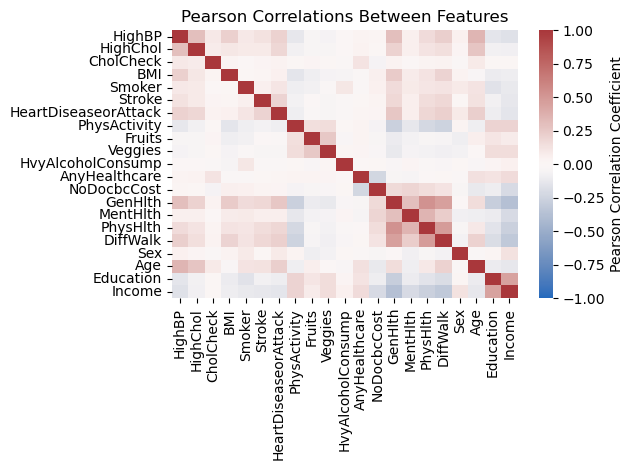

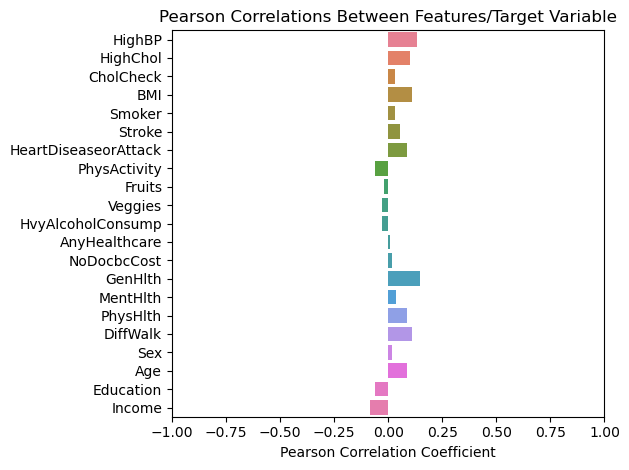

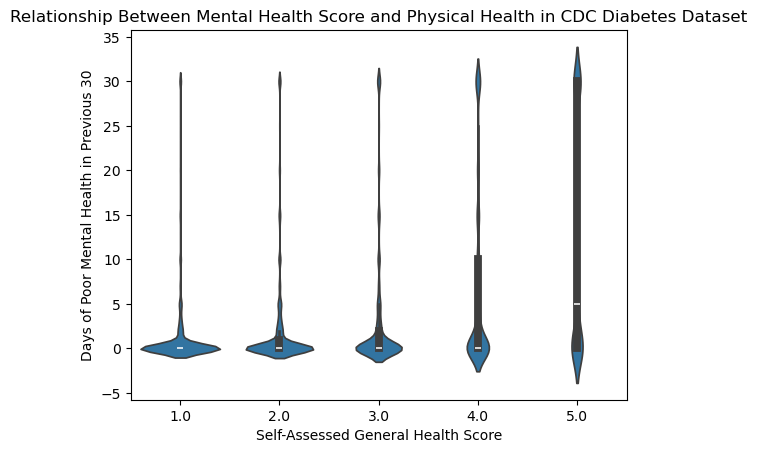

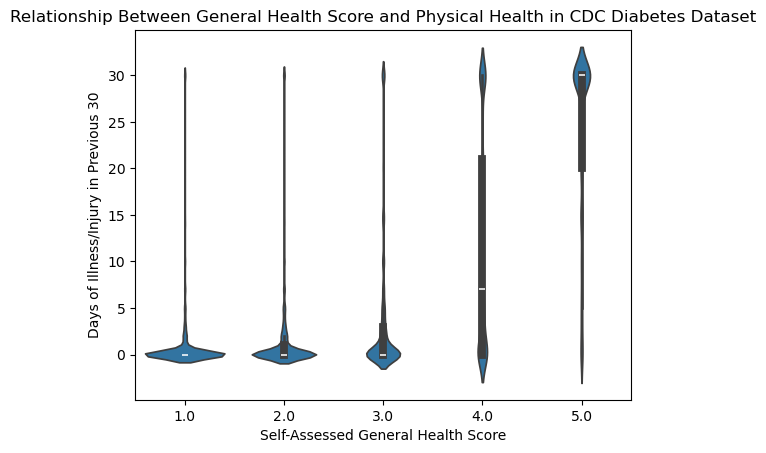

In [129]:
# combinations of features
# analyze correlation between all features
sns.heatmap(X.corr(), cmap="vlag", vmin=-1, vmax=1, cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title("Pearson Correlations Between Features")
plt.tight_layout()
plt.savefig("figures/feature_corr.png", dpi=150)
plt.show()
plt.close()

# analyze correlation with target variable
diabetes_data_corr = pd.DataFrame(columns=X.columns)
for feature in X.columns:
    diabetes_data_corr[feature] = pearsonr(
        diabetes_data[feature],
        diabetes_data["Diabetes_binary"]
    )
sns.barplot(diabetes_data_corr, orient="h", errorbar=None)
plt.xlim((-1,1))
plt.xlabel("Pearson Correlation Coefficient")
plt.title("Pearson Correlations Between Features/Target Variable")
plt.tight_layout()
plt.savefig("figures/target_corr.png", dpi=150)
plt.show()
plt.close()

# relationship between general and mental health
sns.violinplot(data=X, x="GenHlth", y="MentHlth")
plt.title("Relationship Between Mental Health Score and Physical Health in CDC Diabetes Dataset")
plt.xlabel("Self-Assessed General Health Score")
plt.ylabel("Days of Poor Mental Health in Previous 30")
plt.show()
plt.close()

# relationship between general and physical health
sns.violinplot(data=X, x="GenHlth", y="PhysHlth")
plt.title("Relationship Between General Health Score and Physical Health in CDC Diabetes Dataset")
plt.xlabel("Self-Assessed General Health Score")
plt.ylabel("Days of Illness/Injury in Previous 30")
plt.show()
plt.close()

### Data Splitting and Preprocessing

*Splitting*

In [138]:
# split into train/val and test sets
one_percent = int(np.floor(0.01 * X.shape[0]))
X_tv, X_test, y_tv, y_test = train_test_split(X, y,
                                              test_size=one_percent,
                                              stratify=y,
                                              shuffle=True,
                                              random_state=67)

# split into train and val sets with KFold cross-validation
kf = StratifiedShuffleSplit(n_splits = 5, test_size=one_percent, random_state=67)
folds = []
for train_i, val_i in kf.split(X_tv, y_tv):
    folds.append({"X_train" : X_tv.iloc[train_i], "X_val" : X_tv.iloc[val_i],
                  "y_train" : y_tv.iloc[train_i], "y_val" : y_tv.iloc[val_i]})

*Preprocessing*

Our feature matrix consists of four types of features: binary (14/21), ordinal (4/21), and numerical (3/21).

**Binary features:**
Require no preprocessing (already 0/1)

**Ordinal features:**
Must be preprocessed by min-max scaling to ensure all input values are in the same range.

**Numerical features**
Of the 3 numerical features, 2 can be min-max scaled (poor mental and physical health days), since they are discrete and have well-defined ranges (1-30 days). The remaining feature, BMI, can be standard scaled. Preprocessing of these features is done below.

In [139]:
# define features to be preprocessed
std_features = ["BMI"]
mm_features = [
    "PhysHlth",
    "MentHlth",
    "Income",
    "Education",
    "Age",
    "GenHlth"
]

# preprocess folds for training/validation
prep_kfolds = []
for fold in folds:
    
    # make copies
    X_train_prep = fold["X_train"].copy()
    X_val_prep = fold["X_val"].copy()
    
    # standard scale
    std = StandardScaler()
    std.set_output(transform="pandas")
    X_train_prep[std_features] = std.fit_transform(fold["X_train"][std_features])
    X_val_prep[std_features] = std.transform(fold["X_val"][std_features])

    # minmax scale
    mm = MinMaxScaler()
    mm.set_output(transform="pandas")
    X_train_prep[mm_features] = mm.fit_transform(fold["X_train"][mm_features])
    X_val_prep[mm_features] = mm.transform(fold["X_val"][mm_features])

    prep_kfolds.append({"X_train" : X_train_prep,
                        "X_val" : X_val_prep,
                        "y_train" : fold["y_train"],
                        "y_val" : fold["y_val"]})

# preprocess sets for test
X_tv_prep = X_tv.copy()
X_test_prep = X_test.copy()

# standard scale
std = StandardScaler()
std.set_output(transform="pandas")
X_tv_prep[std_features] = std.fit_transform(X_tv[std_features])
X_test_prep[std_features] = std.transform(X_test[std_features])

# minmax scale
mm = MinMaxScaler()
mm.set_output(transform="pandas")
X_tv_prep[mm_features] = mm.fit_transform(X_tv[mm_features])
X_test_prep[mm_features] = mm.transform(X_test[mm_features])

prep_test = {"X_train" : X_tv_prep, "X_test" : X_test_prep,
            "y_train" : y_train, "y_test" : y_test}

In [140]:
# finally, save all data

# save folds for training/validation
for i, fold in enumerate(prep_kfolds):
    out = f"sets/fold_{i}"
    os.makedirs(out, exist_ok=True)
    fold["X_train"].to_csv(f"{out}/X_train_{i}.csv")
    fold["X_val"].to_csv(f"{out}/X_val_{i}.csv")
    fold["y_train"].to_csv(f"{out}/y_train_{i}.csv")
    fold["y_val"].to_csv(f"{out}/y_val_{i}.csv")

os.makedirs("sets/test", exist_ok=True)
prep_test["X_train"].to_csv("sets/test/X_train.csv")
prep_test["X_test"].to_csv("sets/test/X_test.csv")
prep_test["y_train"].to_csv("sets/test/y_train.csv")
prep_test["y_test"].to_csv("sets/test/y_test.csv")